In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import os
import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
basedir = os.getcwd()
dataset = "/fruits-360_dataset_100x100"
train_path = basedir + dataset + "/fruits-360/Training"
test_path = basedir + dataset + "/fruits-360/Test"
fruits = os.listdir(train_path)
fruits

['Onion Red 1',
 'Huckleberry 1',
 'Pomelo Sweetie 1',
 'Potato White 1',
 'Cucumber 3',
 'Papaya 1',
 'Cucumber Ripe 2',
 'Pear 3',
 'Eggplant long 1',
 'Grapefruit Pink 1',
 'Pomegranate 1',
 'Zucchini 1',
 'Apple Golden 2',
 'Tomato Heart 1',
 'Mulberry 1',
 'Hazelnut 1',
 'Pear Kaiser 1',
 'Zucchini dark 1',
 'Cactus fruit 1',
 'Nut Forest 1',
 'Apple Red Yellow 2',
 'Kaki 1',
 'Cherry Rainier 1',
 'Apple Braeburn 1',
 'Banana 1',
 'Apple 6',
 'Onion White 1',
 'Apple Red Delicious 1',
 'Cauliflower 1',
 'Carambula 1',
 'Cabbage white 1',
 'Kiwi 1',
 'Apple Golden 1',
 'Avocado ripe 1',
 'Grape White 2',
 'Peach Flat 1',
 'Orange 1',
 'Tamarillo 1',
 'Pepper Yellow 1',
 'Pear Williams 1',
 'Mango 1',
 'Lemon 1',
 'Tomato not Ripened 1',
 'Redcurrant 1',
 'Pear 2',
 'Plum 3',
 'Potato Sweet 1',
 'Banana Red 1',
 'Grape White 3',
 'Pepper Red 1',
 'Dates 1',
 'Beetroot 1',
 'Banana Lady Finger 1',
 'Pear Stone 1',
 'Lemon Meyer 1',
 'Grape Blue 1',
 'Tomato Yellow 1',
 'Cherry 2',
 '

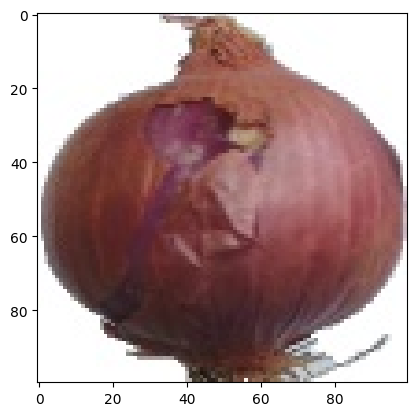

In [3]:
im = Image.open(os.path.join(train_path,fruits[0],os.listdir(train_path + '/' + fruits[0])[0]))
plt.imshow(im)

In [4]:
#using dataloader 
trainfolder = datasets.ImageFolder(train_path, transform=transforms.ToTensor());
testfolder = datasets.ImageFolder(test_path, transform=transforms.ToTensor());
train_size = len(trainfolder)
print(train_size)
test_size = len(testfolder)
val_size = 10000
train_size -= val_size
trainds,valds = random_split(trainfolder, [train_size, val_size])
len(trainds), len(valds), len(testfolder)

70491


(60491, 10000, 23619)

In [5]:
traindataloader = torch.utils.data.DataLoader(trainds, batch_size=128, shuffle=True)
valdataloader = torch.utils.data.DataLoader(valds, batch_size=128, shuffle=True)
testdataloader = torch.utils.data.DataLoader(testfolder, batch_size=128, shuffle=True)

In [6]:
dataiter = iter(traindataloader)
images, labels = next(dataiter)
images.shape, labels.shape, len(traindataloader) * 128, len(valdataloader) * 128, len(testdataloader) * 128

(torch.Size([128, 3, 100, 100]), torch.Size([128]), 60544, 10112, 23680)

In [7]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,3,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16,32,3,padding=1)
        self.conv3 = nn.Conv2d(32,32,3,padding=1)
        self.fc1 = nn.Linear(32 * 12 * 12, 1024) 
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 141)
    def forward(self,x):
        c1 = self.pool(F.relu(self.conv1(x)))
        c2 = self.pool(F.relu(self.conv2(c1)))
        c3 = self.pool(F.relu(self.conv3(c2)))
        l4 = torch.flatten(c3,1)
        l5 = F.relu(self.fc1(l4))
        l6 = F.relu(self.fc2(l5))
        l7 = F.relu(self.fc3(l6))
        out = self.fc4(l7)
        return out

In [8]:
from torch.optim.lr_scheduler import StepLR
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses = []
accuracies = []
num_epochs = 2 
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (images, labels) in enumerate(traindataloader):
        optimizer.zero_grad()
        outputs = model(images)
        cat = torch.argmax(outputs, dim=1) 
        accuracy = (cat == labels).float().mean() #check how many are right
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f'Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item():.4f}, accuracy : {accuracy}')
            accuracies.append(accuracy)
            losses.append(loss)

print('Training complete')


Epoch 0, Batch 0, Loss: 4.9459, accuracy : 0.0
Epoch 0, Batch 10, Loss: 4.9360, accuracy : 0.0078125
Epoch 0, Batch 20, Loss: 4.9281, accuracy : 0.015625
Epoch 0, Batch 30, Loss: 4.7204, accuracy : 0.0234375
Epoch 0, Batch 40, Loss: 4.6065, accuracy : 0.015625
Epoch 0, Batch 50, Loss: 4.4299, accuracy : 0.015625
Epoch 0, Batch 60, Loss: 3.7319, accuracy : 0.1171875
Epoch 0, Batch 70, Loss: 3.3804, accuracy : 0.1328125
Epoch 0, Batch 80, Loss: 3.0819, accuracy : 0.09375
Epoch 0, Batch 90, Loss: 2.5900, accuracy : 0.25
Epoch 0, Batch 100, Loss: 2.3960, accuracy : 0.3203125
Epoch 0, Batch 110, Loss: 2.1603, accuracy : 0.296875
Epoch 0, Batch 120, Loss: 1.8590, accuracy : 0.390625
Epoch 0, Batch 130, Loss: 1.6622, accuracy : 0.484375
Epoch 0, Batch 140, Loss: 1.8442, accuracy : 0.4375
Epoch 0, Batch 150, Loss: 1.6387, accuracy : 0.453125
Epoch 0, Batch 160, Loss: 1.3001, accuracy : 0.59375
Epoch 0, Batch 170, Loss: 1.3631, accuracy : 0.515625
Epoch 0, Batch 180, Loss: 1.2335, accuracy : 0.

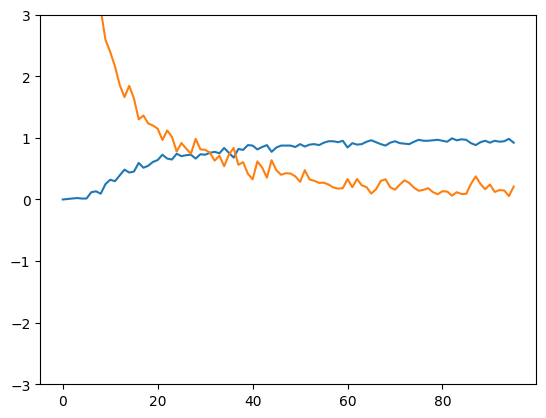

In [15]:
import numpy 
plt.plot(accuracies)
plt.plot(numpy.vstack([t.detach().numpy() for t in losses]))
plt.ylim(-3,3)
plt.show()

In [28]:
#validation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in valdataloader:
        outputs = model(images)
        cat = torch.argmax(outputs, dim=1) 
        #accuracy = (cat == labels).float().mean() #check how many are right
        total += len(labels) 
        correct += (cat == labels).float().sum()
print(correct/total)

tensor(0.9662)


In [ ]:
#testing
model.eval()  # Set the model to evaluation mode
total_loss = 0
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for images, labels in testdataloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        total_loss += loss.item()
        total += labels.size(0)
        cat = torch.argmax(outputs,dim=1)
        correct += (cat == labels).float().sum()

avg_loss = total_loss / len(testdataloader)
accuracy = 100. * correct / total

print(f'Test Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

avg_loss, accuracy

In [47]:
total
correct
total_loss/len(testdataloader)

0.742358136177063

In [3]:
#add all data in filename
# def load_data(path):
#     folders = [f for f in os.listdir(path)]
#     images = []
#     imglabels = []
#     labels = [] 
#     yes = True
#     for f in folders:
#         labels.append(f)
#         folder_path = os.path.join(path, f)
#         cur_images = [(folder_path + "/" + img) for img in os.listdir(folder_path)]
#         imglabels.extend(len(cur_images) * [f])
#         images.extend(cur_images)
#     return np.array(images), np.array(imglabels), labels

# X_train, Y_train, labels = load_data(train_path)
# X_test, Y_test, _ = load_data(test_path)
# len(Y_train)

70491

In [4]:
#process Y's into number and prob distribution for loss function
# Y_train_temp = np.zeros((len(Y_train),len(labels)))
# Y_test_temp = np.zeros((len(Y_test),len(labels)))
# for cnt, label in enumerate(labels):
#     for i in range(len(Y_train)):
#         if Y_train[i] == label:
#             Y_train_temp[i][cnt] = 1 
#     for i in range(len(Y_test)):
#         if Y_test[i] == label:
#             Y_test_temp[i][cnt] = 1
# Y_train = Y_train_temp
# Y_test = Y_test_temp
# print(Y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
#shuffle
# trainp = np.random.permutation(len(X_train))
# X_train = X_train[trainp]
# Y_train = Y_train[trainp]
# testp = np.random.permutation(len(X_test))
# X_test = X_test[testp]
# Y_test = Y_test[testp]
# Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [3]:
# transform = transforms.Compose([
#     transforms.Resize((128,128)),
#     transforms.ToTensor(),
# ])

In [ ]:
#preparing dataset attempt #2
# def prepare_dataset(base_dir, transform=None):
#     dataset = []
#     labels = sorted(os.listdir(base_dir))
#     for cnt, label_name in enumerate(labels):
#         folder_path = os.path.join(base_dir, label_name)
#         if os.path.isdir(folder_path):
#             for img in os.listdir(folder_path):
#                 img_path = os.path.join(folder_path, img)

#                 with Image.open(img_path) as curimg:
#                     curimg = curimg.convert("RGB")
#                     if transform:
#                         curimg = transform(curimg)
#                 dataset.append((curimg, label_name))
# train_data = prepare_dataset(train_path, transform=transform)